In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
df=pd.read_csv('economic_index.csv')

In [43]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [44]:
df.shape

(24, 6)

In [45]:
df.drop(columns=["Unnamed: 0",'year','month'],inplace=True)

In [46]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [47]:
df.shape

(24, 3)

In [48]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


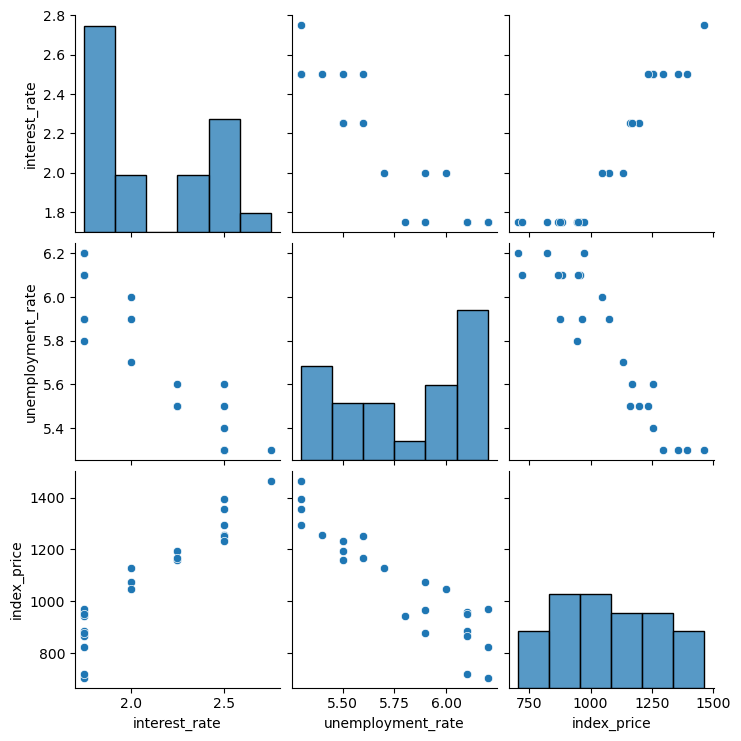

In [49]:
sns.pairplot(df)

In [50]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
LR=LinearRegression(n_jobs=-1)
LR.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [55]:
LR.predict(x_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([960.91086242, 823.21764347, 838.66748692, 846.39240864,
       984.08562759, 871.69035703])

In [56]:
LR.coef_

array([132.09148045, -77.24921723])

In [57]:
LR.intercept_

np.float64(1063.2777777777778)

In [58]:
y_pred=LR.predict(x_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [60]:
print(mse,mae,rmse)

51235.88573625739 203.00593565182973 226.35345311317298


<Axes: xlabel='interest_rate', ylabel='index_price'>

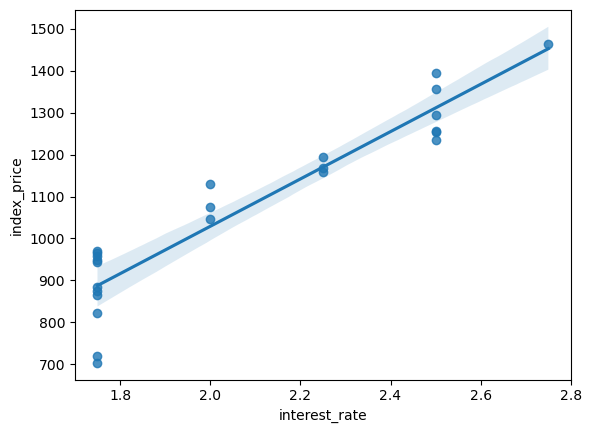

In [61]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

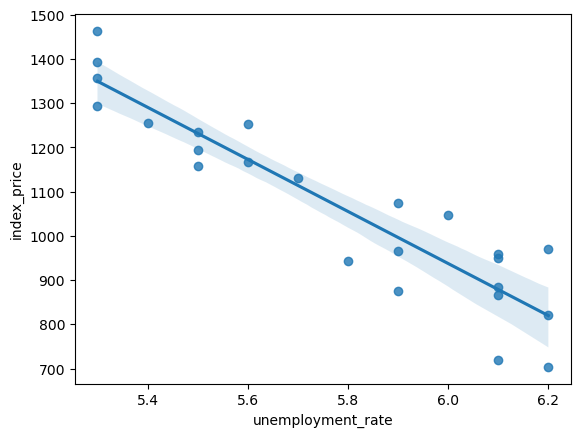

In [62]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])

In [65]:
residual=y_test-y_pred
print(residual)

5     293.089138
17    125.782357
13    126.332513
14     96.607591
2     372.914372
11    203.309643
Name: index_price, dtype: float64


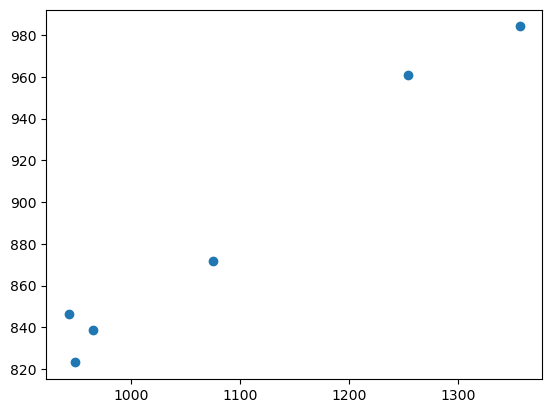

In [63]:
plt.scatter(y_test,y_pred)

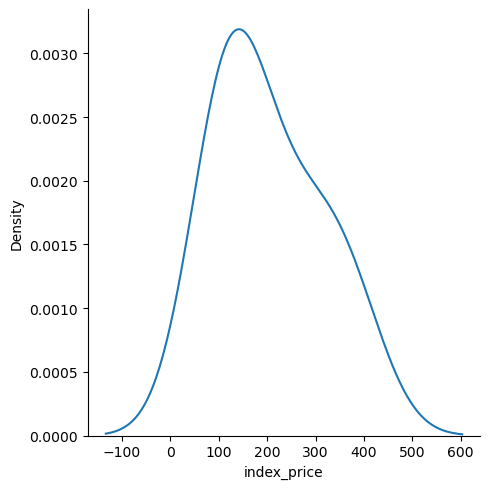

In [69]:
sns.displot(residual,kind='kde')

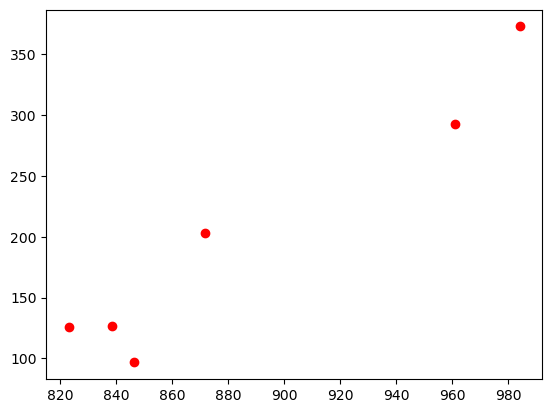

In [71]:
plt.scatter(y_pred,residual,c='red')